# Business Case

**Title:** Optimization of Workforce Management and Cost Efficiency in State Agencies

**Executive Summary**
State agencies face challenges in managing workforce costs while ensuring equitable employment practices and compliance with regulatory standards. This business case aims to analyze employee data from various agencies to identify trends in compensation, employment status, and workforce demographics. The goal is to develop a strategic approach to optimize human resource allocation and enhance cost efficiency.

# Problem Definition

**High Duplicates and Multiple Jobs:** A significant number of employees have duplicate records and multiple roles across agencies. This complicates payroll management and may lead to inflated salary expenditures.

**Inconsistent Employment Status:** Variations in employment status (e.g., part-time vs. full-time) create disparities in benefits and compensation that may affect employee morale and retention.

**Compensation Discrepancies:** There are notable differences in hourly rates and annual salaries among employees performing similar roles, which could raise concerns regarding equity and fairness.

**Lack of Insights on Diversity:** The existing data lacks a comprehensive analysis of workforce diversity, making it difficult to ensure equitable representation across roles.

**Importing necessary libraries**

In [1]:
import pandas as pd  # importing pandas for analyzing, cleaning, exploring, and manipulating data
import numpy as np # for numrical and statistical calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import warnings # for the warnings
warnings.filterwarnings('ignore') # use for ignore the warning

In [2]:
data = pd.read_csv("salary.csv") # Load the label csv file

In [3]:
pd.set_option('display.max_columns', None) # for see all columns

## Data Understanding
* **Explore the Data:**
  * Check the data types of each column.
  * Understand the categorical and numerical features.
  * Identify missing values or inconsistencies.

### **Basic check**

In [4]:
data.head() # See the data top rows

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [5]:
data.tail() # See the data last rows

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info() # Check the data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

#### **Insights**
**Duplicated Records:**

The duplicated column has only 143 non-null entries. This suggests that most employees do not have duplicates, but those who do may require further investigation.

**Multiple Full-Time Jobs:**

With only 14 non-null entries in the multiple_full_time_jobs column, it appears that holding multiple full-time positions is uncommon among employees in this dataset.

**Combined Multiple Jobs:**

The combined_multiple_jobs column has 97 non-null entries. This indicates that while some employees may hold multiple roles, it's not widespread.

**Summed Annual Salary:**

The summed_annual_salary column has only 16 non-null values, suggesting that few employees have salaries calculated from multiple roles. This could highlight the need for clearer policies on compensating employees with multiple positions.

**Hide From Search:**

The hide_from_search column also shows limited data, with 16 non-null entries, implying that only a small subset of employees is flagged to be hidden from searches.

### Column Explanations
**AGENCY:** A unique identifier for the agency where the employee works.

**AGENCY NAME:** The name of the agency employing the individual.

**LAST NAME:** The employee's last name.

**FIRST NAME:** The employee's first name.

**MI:** Middle initial of the employee (if applicable).

**CLASS CODE**: A code representing the specific classification of the employee's job.

**CLASS TITLE:** The official title of the employee's position.

**ETHNICITY:** The ethnic background of the employee (e.g., White, Hispanic).

**GENDER:** The gender of the employee (e.g., Male, Female).

**STATUS:** The employment status of the employee, indicating whether they are classified (CTP), unclassified (URP), or in another employment category.

**EMPLOY DATE:** The date the employee was hired.

**HRLY RATE:** The hourly wage rate of the employee.

**HRS PER WK:** The number of hours the employee works per week.

**MONTHLY:** The monthly salary of the employee calculated from the hourly rate and hours worked.

**ANNUAL:** The annual salary of the employee, also derived from the hourly rate and hours worked.

**STATE NUMBER:** A unique identifier related to the employee or position at the state level.

**duplicated:** Indicates whether there are duplicate records for the employee in the dataset (True/False).

**multiple_full_time_jobs:** A flag indicating if the employee holds multiple full-time positions (if applicable).

**combined_multiple_jobs:** A field that may represent combined compensation from multiple jobs if the employee holds more than one position.

**summed_annual_salary:** The total annual salary if the employee has multiple roles combined.

**hide_from_search:** A flag indicating whether the employee's record should be hidden from search queries (True/False).

In [7]:
data.isnull().sum() # Identify missing values or inconsistencies.

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

#### **Insights**

* **High Data Completeness:** All key columns related to employee identity, classification, and compensation have no missing values. This indicates a robust dataset for conducting analyses related to workforce demographics, roles, and compensation.

* **Duplicate Records:** The duplicated column shows that 143 entries may have duplicates. This should be investigated to ensure accurate reporting and avoid potential payroll errors.

* **Rare Multiple Full-Time Positions:** The multiple_full_time_jobs column has 149,467 missing values, indicating that very few employees are recorded as having multiple full-time jobs. This suggests that such employment arrangements are uncommon or not properly tracked.

* **Combined Roles Underreported:** Similarly, combined_multiple_jobs has 149,384 missing values, indicating a lack of documentation for employees who may hold multiple positions within the organization. This points to a potential area for improved tracking and management.

* **Low Reporting of Summed Salaries:** The summed_annual_salary column has only 16 non-null entries. This indicates a significant gap in how combined salaries from multiple roles are captured, suggesting a need for better policies or systems to document such cases.

* **Limited Sensitive Data Flags:** The hide_from_search column also has only 16 non-null entries, implying that only a small number of employee records are marked as sensitive or confidential. This could indicate effective data management practices regarding privacy.

In [8]:
data.describe() # Here we can can see the statistical information of numerical columns

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


#### **Insights**

* **High Average Hourly Rate:** The mean hourly rate is $545.74, indicating that employees are compensated at a high rate relative to typical salaries. This suggests specialized roles or high-demand positions.

* **Low Average Weekly Hours:** The average hours worked per week is 0.35. This extremely low value may indicate that many employees are either part-time, on leave, or inconsistently reported.

* **Monthly and Annual Compensation:** The average monthly salary is 4,226.18 dollar, and the average annual salary is 42,226.18 dollar Given the high hourly rates, this suggests that many employees may be working fewer hours than expected.

* **Compensation Variability:** The standard deviation of the annual salary is $2,093.11, indicating a moderate variability in salaries. This could suggest disparities in roles or seniority levels among employees.

* **Minimum and Maximum Salaries:** The minimum annual salary is 50 dollar, which is unusually low and may indicate an error or an employee with very few hours recorded. Conversely, the maximum annual salary is 46,125 dollar, suggesting that there are significantly higher-paying roles.

* **Presence of Multiple Full-Time Jobs:** The multiple_full_time_jobs column has only 14 instances, indicating that most employees do not hold multiple full-time positions, which aligns with the low average hours.

* **Limited Summed Annual Salaries:** Only 16 instances of summed annual salaries suggest a lack of tracking for employees with multiple roles, highlighting a potential area for improved record-keeping and compensation practices.

* **Salary Distribution:** The 25th percentile annual salary is 32,962.50 dollar, the median is 48,063.30 dollar, and the 75th percentile is $123,751.77. This indicates a skewed salary distribution, with a significant gap between lower and higher earners.

In [9]:
data.describe(include="O") # Here we can can see the statistical information of categorical columns

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


**Insights**

* **Agency Diversity:** There are 113 unique agencies represented, indicating a diverse workforce across various governmental departments.

* **Common Last Names:** The most frequent last name is "Smith", appearing 1,243 times. This suggests that common surnames could be prevalent within the dataset, which may affect analysis related to demographics.

* **Diversity in Job Titles:** There are 1,422 unique class titles. This variety indicates a broad range of roles and responsibilities among employees, reflecting the complexity of the organizational structure.

* **Ethnic and Gender Distribution:** The dataset contains 6 unique ethnicities and 2 genders. This diversity can provide insights into workforce representation but may also highlight potential disparities in hiring practices.

* **Employment Status:** The majority of employees are classified as "CRF - CLASSIFIED REGULAR FULL-TIME" (frequency of 85,328). This suggests a stable workforce primarily composed of full-time employees.

* **Employment Date:** The EMPLOY DATE shows a range of hiring dates, with a top frequency of September 1, 2017. This could indicate a wave of hiring during that period.

* **Duplicated Records:** With 143 duplicate entries, it is essential to investigate these records for accuracy and to ensure proper reporting.

* **Combined Multiple Jobs:** The combined_multiple_jobs column indicates 97 instances where employees may have roles combined. This suggests that tracking employees with multiple positions could be an area for improvement.

* **Sensitive Data:** The hide_from_search column has only 16 instances indicating confidentiality. This limited data suggests effective management of sensitive employee information.

## Data Exploration and Cleaning

* **Objective:** Understand the dataset and identify any missing or inconsistent values.

* **Actions:**
  * Perform exploratory data analysis (EDA) to summarize the main characteristics of the dataset.
  * Identify and handle missing values using techniques such as imputation or removal.
  * Convert categorical variables (e.g., thal, chest pain type) into numerical representations if necessary.

* Here we find the unique values of all columns

**AGENCY**

In [10]:
data.AGENCY.unique() # here find the unique value

array([241, 212, 696, 302, 601, 510, 520, 537, 530, 529, 551, 771, 772,
       101, 104, 102, 303, 809, 103, 105, 201, 211, 213, 215, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 242,
       243, 300, 301, 304, 306, 307, 313, 320, 323, 326, 329, 332, 338,
       352, 360, 401, 403, 405, 407, 448, 452, 454, 455, 457, 458, 459,
       460, 464, 469, 473, 479, 481, 503, 508, 513, 515, 533, 542, 554,
       608, 644, 701, 781, 802, 813, 907, 930, 116, 305, 308, 312, 327,
       347, 356, 359, 362, 364, 409, 411, 450, 451, 456, 466, 475, 476,
       477, 504, 507, 514, 578, 580, 582, 592, 808], dtype=int64)

**AGENCY NAME**

In [11]:
data["AGENCY NAME"].unique() # here find the unique value

array(['COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION ',
       'OFFICE OF COURT ADMINISTRATION                    ',
       'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              ',
       'OFFICE OF THE ATTORNEY GENERAL                    ',
       'TEXAS DEPARTMENT OF TRANSPORTATION                ',
       'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL         ',
       'BOARD OF EXAMINERS OF PSYCHOLOGISTS               ',
       'DEPARTMENT OF STATE HEALTH SERVICES               ',
       'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      ',
       'HEALTH AND HUMAN SERVICES COMMISSION              ',
       'DEPARTMENT OF AGRICULTURE                         ',
       'SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED        ',
       'SCHOOL FOR THE DEAF                               ',
       'SENATE                                            ',
       'LEGISLATIVE BUDGET BOARD                          ',
       'HOUSE OF REPRESENTATIVES                          ',
       'TEXAS FACILITIES

**LAST NAME**

In [12]:
len(data["LAST NAME"].unique()) # here find the unique value

38675

**FIRST NAME**

In [13]:
len(data["FIRST NAME"].unique()) # here find the unique value

23559

**MI**

In [14]:
data["MI"].unique() # here find the unique value

array(['V', 'J', ' ', 'D', 'A', 'C', 'M', 'R', 'T', 'F', 'P', 'G', 'L',
       'K', 'E', 'S', 'W', 'N', 'X', 'O', 'B', 'H', 'Y', 'I', 'Z', 'U',
       'Q'], dtype=object)

* Here we can see the corrupted value blank space

In [15]:
len(data["CLASS CODE"].unique()) # here find the unique value

1481

**CLASS TITLE**

In [16]:
data["CLASS TITLE"].unique() # here find the unique value

array(['JUDGE, RETIRED                                    ',
       'GENERAL COUNSEL IV                                ',
       'CORREC  OFFICER IV                                ', ...,
       'CURATOR III                                       ',
       'CURATOR IV                                        ',
       'EQUIPMENT MAINT TECH I                            '], dtype=object)

**ETHNICITY**

In [17]:
data["ETHNICITY"].unique() # here find the unique value

array(['WHITE          ', 'HISPANIC       ', 'BLACK          ',
       'OTHER          ', 'AM INDIAN      ', 'ASIAN          '],
      dtype=object)

**GENDER**

In [18]:
data["GENDER"].unique() # here find the unique value

array(['MALE           ', 'FEMALE         '], dtype=object)

**STATUS**

In [19]:
data["STATUS"].unique() # here find the unique value

array(['URP - UNCLASSIFIED REGULAR PART-TIME    ',
       'CTP - CLASSIFIED TEMPORARY PART-TIME    ',
       'CRF - CLASSIFIED REGULAR FULL-TIME      ',
       'ERP - EXEMPT REGULAR PART-TIME          ',
       'CRP - CLASSIFIED REGULAR PART-TIME      ',
       'URF - UNCLASSIFIED REGULAR FULL-TIME    ',
       'CTP - CLASSIFIED TEMPORARY FULL-TIME    ',
       'UTF - UNCLASSIFIED TEMPORARY FULL-TIME  ',
       'UTP - UNCLASSIFIED TEMPORARY PART-TIME  ',
       'ERF - EXEMPT REGULAR FULL-TIME          ',
       'CTF - CLASSIFIED TEMPORARY FULL-TIME    '], dtype=object)

**EMPLOY DATE**

In [20]:
len(data["EMPLOY DATE"].unique()) # here find the unique value

6295

**HRLY RATE**

In [21]:
data["HRLY RATE"].unique() # here find the unique value

array([ 75.9615 ,  81.04454,  81.04453,   0.     ,  49.40717,  28.58   ,
        25.     ,  17.33   ,  13.13   ,  11.5    ,  20.00002,  14.82693,
        30.16251,  16.01272,  19.     ,  67.30765,  75.96   ,  30.     ,
        16.17   ,  13.5    ,  52.     ,  30.87   ,  82.635  ,  30.1    ,
        17.00001,  28.88   ,  16.33   ,  66.37   ,  17.00002,  19.23   ,
        17.     ,  33.66   ,  46.7    ,  28.85   ,  15.10003,  44.5673 ,
        17.45717,  15.75   ,  14.     ,  56.44   ,  55.49   ,  25.86   ,
        27.9777 ,  11.32413, 117.78848,  79.95813,  34.25723,  28.08311,
        11.43317,  24.9998 ,  11.32412,  37.95808,  85.16291,  25.79703,
        18.30598,  11.32401,  11.3241 ,  11.43852,  11.32403,  71.07391,
        11.32414,  25.83471,  71.06982,  71.07392,  11.32404,  20.24447,
        11.73837,  10.42365,  29.7649 ,  28.41882,  28.82221,  19.1689 ,
        76.34569,  34.20696,  11.44324,  11.63612,  13.34336,  12.55817,
        31.06644,  21.52511,  24.39762,  28.89445, 

**HRS PER WK**

In [22]:
data["HRS PER WK"].unique() # here find the unique value

array([29.  ,  4.  , 40.  , 20.  , 16.  , 19.  ,  7.  , 41.  , 30.  ,
       32.  ,  8.  , 10.  , 50.  , 60.  , 55.  , 70.  , 18.  , 25.  ,
       27.  , 28.  , 11.  , 15.  , 24.  , 26.  , 36.  , 19.2 , 39.6 ,
       29.3 , 26.93,  8.4 , 23.2 ,  5.2 , 22.5 ,  3.35, 35.  ,  4.15,
       12.  ,  5.  , 19.6 , 38.8 , 13.5 , 19.04, 36.25, 36.24, 33.  ,
       31.28, 36.21, 21.76, 30.6 , 13.88, 20.92, 30.4 ,  1.  ,  6.  ,
       14.  , 17.2 , 22.  , 23.  ])

**MONTHLY**

In [23]:
len(data["MONTHLY"].unique()) # here find the unique value

40552

**ANNUAL**

In [24]:
len(data["ANNUAL"].unique()) # here find the unique value

40554

**STATE NUMBER**

In [25]:
len(data["STATE NUMBER"].unique()) # here find the unique value

149465

**duplicated**

In [26]:
data["duplicated"].unique() # here find the unique value

array([True, nan], dtype=object)

**multiple_full_time_jobs**

In [27]:
data["multiple_full_time_jobs"].unique() # here find the unique value

array([nan,  1.])

**combined_multiple_jobs**

In [28]:
data["combined_multiple_jobs"].unique() # here find the unique value

array([nan, True], dtype=object)

**summed_annual_salary**

In [29]:
data["summed_annual_salary"].unique() # here find the unique value

array([131407.08,       nan, 171383.4 ,  31950.  ,  33300.  ,  33966.  ,
        39174.  ,  35570.52,  56952.6 ,  21839.76, 121200.  ,  90000.  ,
       150000.  ,  92400.  ,  18000.  ,  30312.84])

**hide_from_search**

In [30]:
data["hide_from_search"].unique() # here find the unique value

array([nan, True], dtype=object)

## Data Transformation:
* Encode categorical variables.

* __Label encoding columns:__ AGENCY, AGENCY NAME, LAST NAME, FIRST NAME, MI, CLASS CODE, CLASS TITLE, ETHNICITY, STATUS
* __One-Hot Encoding columns:__ GENDER

__Apply Label Encoding__

In [31]:
from sklearn.preprocessing import LabelEncoder # Import Library for encoding

In [32]:
# Label Encoding
label_encoder = LabelEncoder() # save the Label Encoder

# creating a list for encoding
label_columns = ["AGENCY", "AGENCY NAME", "LAST NAME", "FIRST NAME", "MI", "CLASS CODE", "CLASS TITLE", "ETHNICITY", "STATUS",
                 "duplicated", "hide_from_search","combined_multiple_jobs"]
for col in label_columns: # creating a for loop
    data[col] = label_encoder.fit_transform(data[col]) # Transform the categorical columns into numerical columns

__Apply One-Hot Encoding__

In [33]:
# Creating separate column for all below columns as per their unique values
data = pd.get_dummies(data, columns=["GENDER"], dtype=int) 

__Apply date time format__

In [34]:
# Convert 'EMPLOY DATE' to datetime
data['EMPLOY DATE'] = pd.to_datetime(data['EMPLOY DATE'], format='%m/%d/%y')

In [35]:
# Create separate columns for day, month, and year
data['EMPLOY_MONTH'] = data['EMPLOY DATE'].dt.month
data['EMPLOY_DAY'] = data['EMPLOY DATE'].dt.day
data['EMPLOY_YEAR'] = data['EMPLOY DATE'].dt.year

In [36]:
# Optional: Drop the original 'EMPLOY DATE' column if not needed
data.drop(columns=['EMPLOY DATE'], inplace=True)

## Feature Engineering

* **Objective:** Enhance the dataset with meaningful features that improve model accuracy.
* **Actions:**
  * Normalize or standardize features to ensure comparability.

### Data Cleaning

* Here we handle the null values

In [37]:
data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
STATUS                          0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                      0
multiple_full_time_jobs    149467
combined_multiple_jobs          0
summed_annual_salary       149465
hide_from_search                0
GENDER_FEMALE                   0
GENDER_MALE                     0
EMPLOY_MONTH                    0
EMPLOY_DAY                      0
EMPLOY_YEAR                     0
dtype: int64

* Here we can see the multiple_full_time_jobs, summed_annual_salary columns has null values

**multiple_full_time_jobs**

In [38]:
data.multiple_full_time_jobs.unique() # here we see the unique values of multiple_full_time_jobs column

array([nan,  1.])

In [39]:
data.loc[(data.multiple_full_time_jobs).isnull(), "multiple_full_time_jobs"] = 0 # Here we fill the null values by "0"

**summed_annual_salary**

In [40]:
data.summed_annual_salary.unique() # here we see the unique values of summed_annual_salary column

array([131407.08,       nan, 171383.4 ,  31950.  ,  33300.  ,  33966.  ,
        39174.  ,  35570.52,  56952.6 ,  21839.76, 121200.  ,  90000.  ,
       150000.  ,  92400.  ,  18000.  ,  30312.84])

In [41]:
data.loc[(data.summed_annual_salary).isnull(), "summed_annual_salary"] = 0 # Here we fill the null values by "0"

* Here we handled all null values and corrupted values and columns datatype

### Exploratory Data Analysis (EDA)
#### **Univariate Analysis:**
  * Visualize distributions of features.

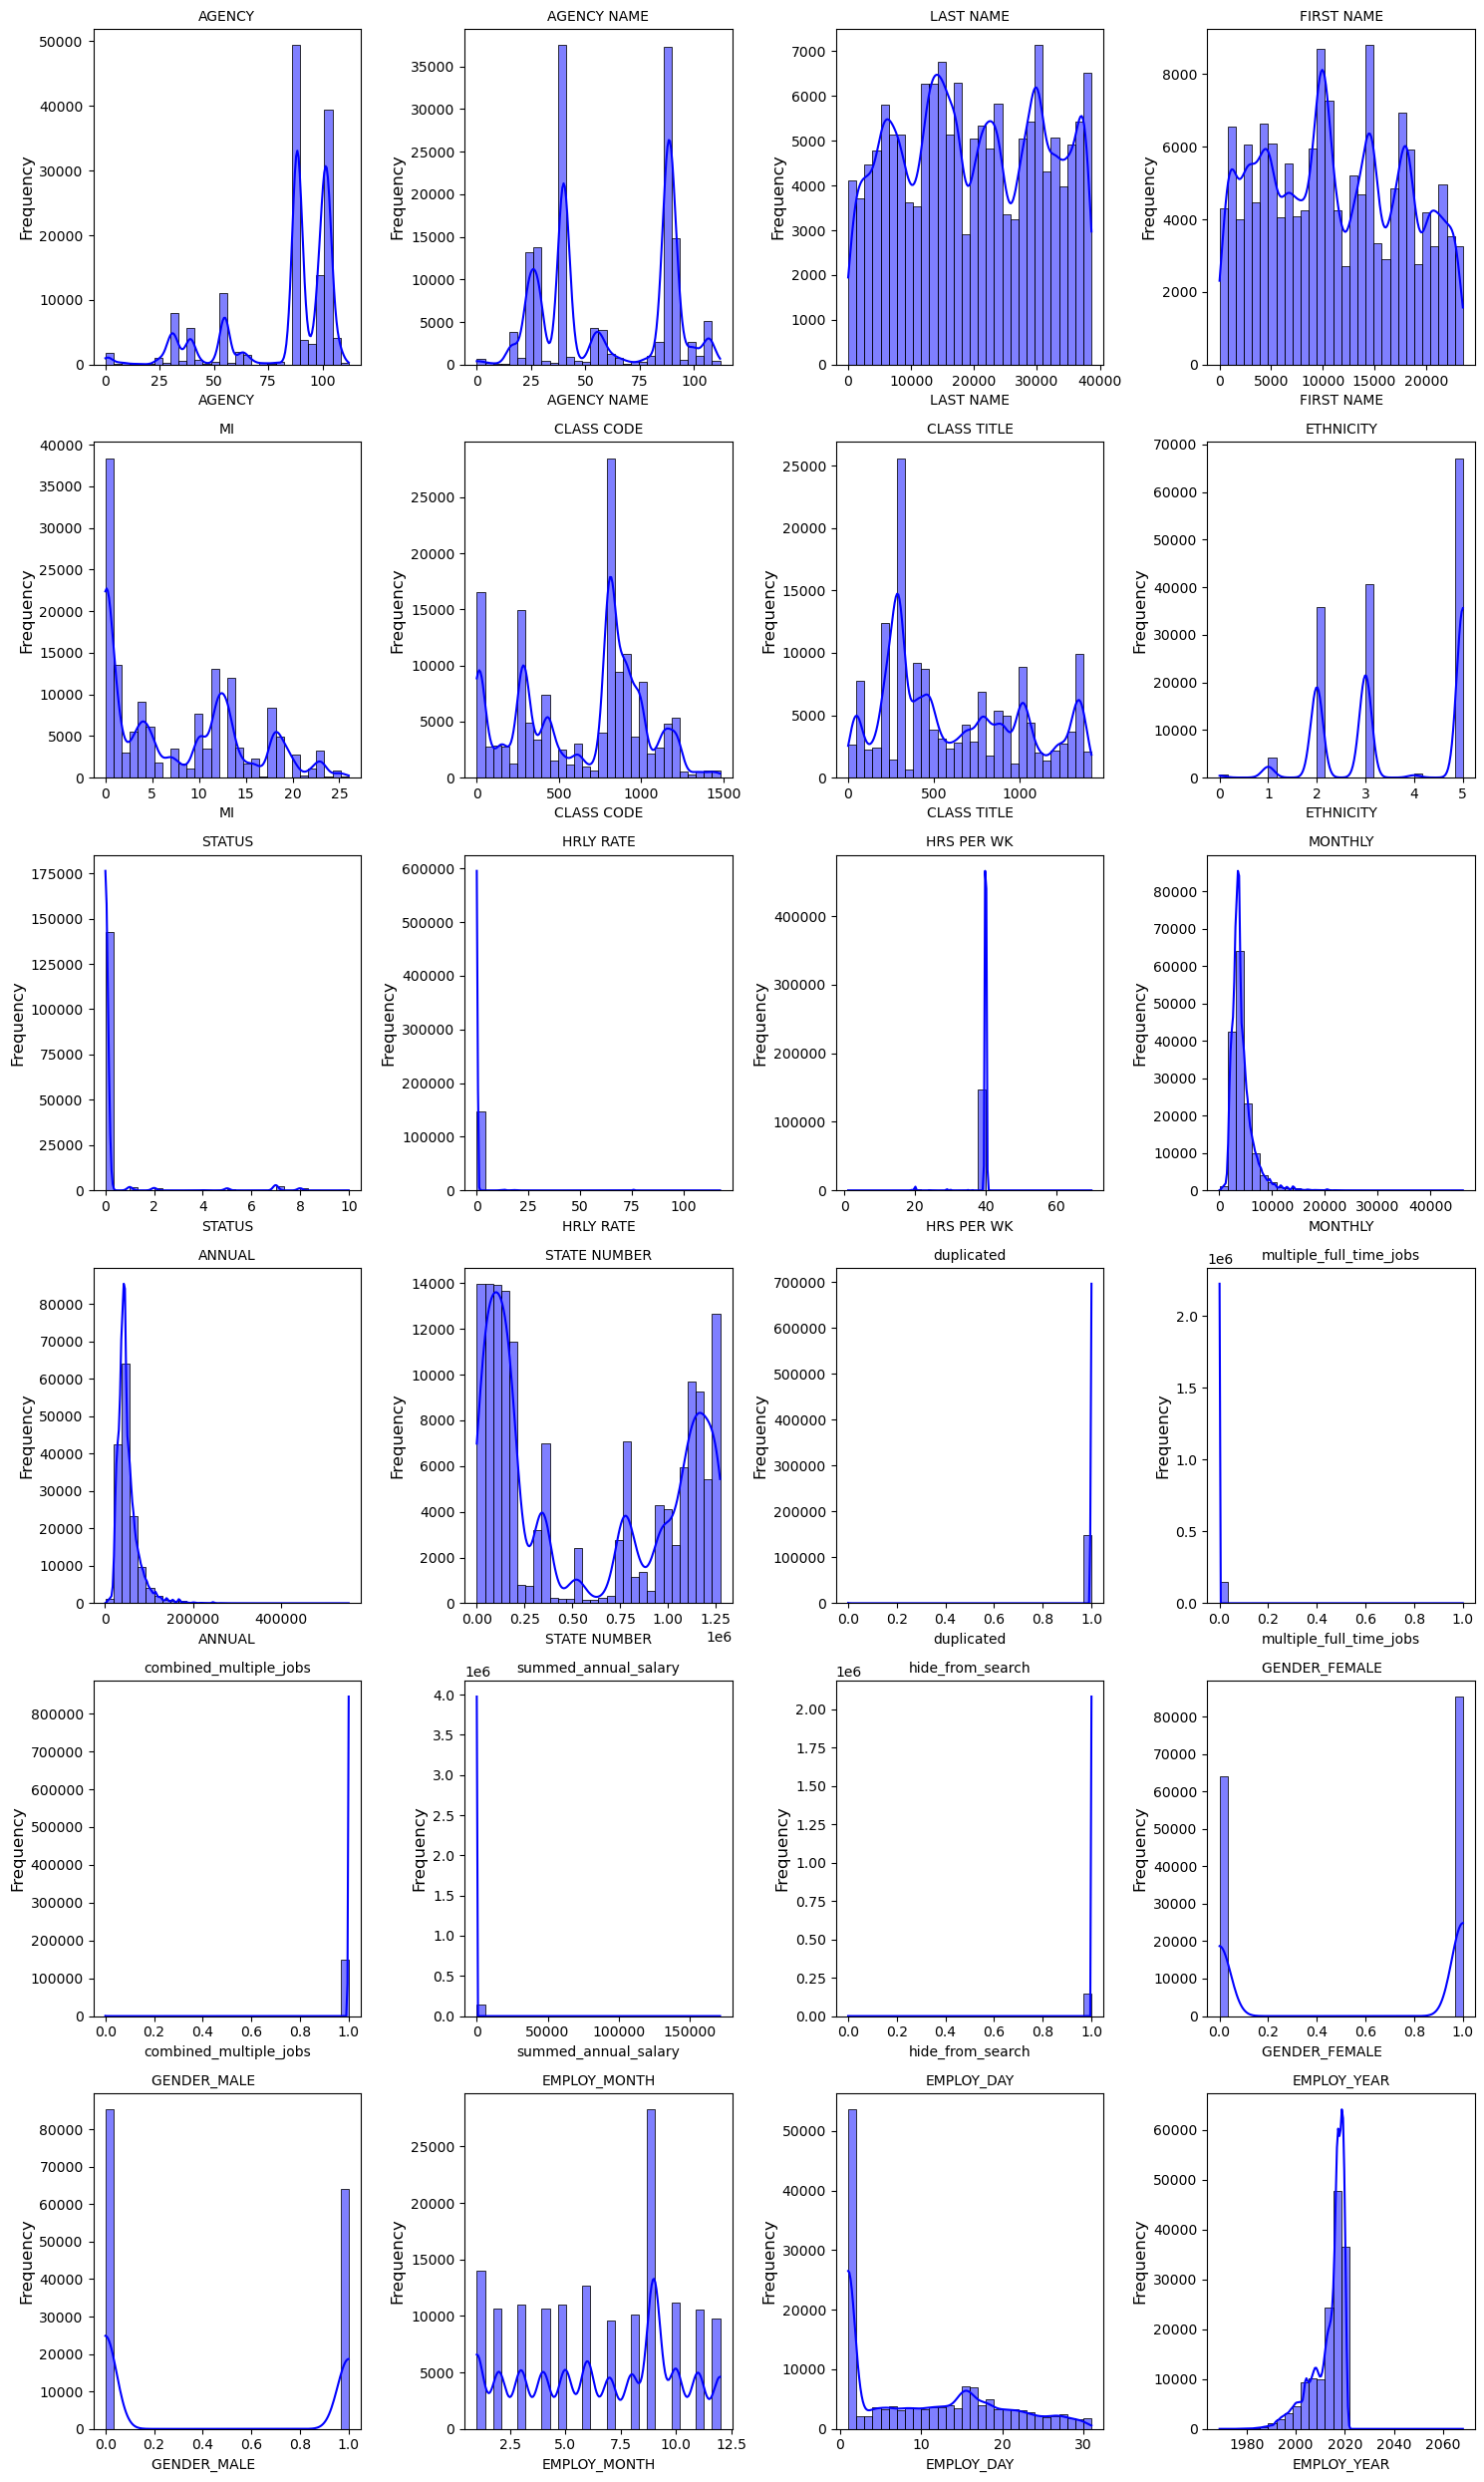

In [42]:
plt.figure(figsize=(15, 25))  # figure size

# Set the number of features and determine the layout
num_features = len(data.columns) # calculate the number of columns
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(data.columns, start=1):
    plt.subplot(num_rows, num_cols, plot_num) # here we set the sub plot 
    sns.histplot(data[feature], kde=True, bins=30, color='blue')  # Using sns.histplot with kde
    plt.title(feature, fontsize=10) # set the size of title
    plt.ylabel('Frequency', fontsize=12) # set the size of y

# Show all plots at once
plt.tight_layout()  # This helps in adjusting subplots to fit into the figure area.
plt.show() # show the the graph

#### **Insights**
**Agency:** The distribution is highly skewed, suggesting that a few agencies might be responsible for a large number of listings.

**Agency Name:** The distribution is also highly skewed, with a few agency names appearing more frequently.

**Last Name and First Name:** These distributions are also skewed, indicating that some names are more common than others.

**Sex:** The distribution shows that the majority of individuals are male.

**Agency Code:** The distribution is skewed, with a few agency codes appearing more frequently.

**Class Title:** The distribution is skewed, with a few class titles appearing more frequently.

**Ethnicity:** The distribution is skewed, with a few ethnicities appearing more frequently.

**Status:** The distribution is highly skewed, with a few status values appearing more frequently.

**Hourly Rate:** The distribution is skewed, with a long tail towards higher rates. This indicates that there are a significant number of low-paying jobs, but also a smaller number of very high-paying ones.

**Hours Per Week:** The distribution is skewed, with a few values appearing more frequently.

**Monthly Salary:** The distribution is skewed, with a long tail towards higher salaries. This indicates that there are a significant number of low-
paying jobs, but also a smaller number of very high-paying ones.

**Annual Salary:** The distribution is skewed, with a long tail towards higher salaries. This indicates that there are a significant number of low-paying jobs, but also a smaller number of very high-paying ones.

**State Number:** The distribution is skewed, with a few state numbers appearing more frequently.

**Duplicated:** The distribution is skewed, with a few values appearing more frequently.

**Multiple Full-Time Jobs:** The distribution is skewed, with a few values appearing more frequently.

**combined_multiple_jobs:** The distribution is highly skewed, with a few values appearing more frequently.

**summed_annual_salary:** The distribution is skewed, with a long tail towards higher salaries. This indicates that there are a significant number of low-paying jobs, but also a smaller number of very high-paying ones.

**hide_from_search:** The distribution is skewed, with a few values appearing more frequently.

**gender:** The distribution shows that the majority of individuals are female.

**employ_month:** The distribution is skewed, with a few months appearing more frequently.

**employ_day:** The distribution is skewed, with a few days appearing more frequently.

**employ_year:** The distribution is skewed, with a few years appearing more frequently.

#### **Bivariate Analysis:**
  * Explore relationships between features and the target variable.
  * Use visualizations to check for patterns.

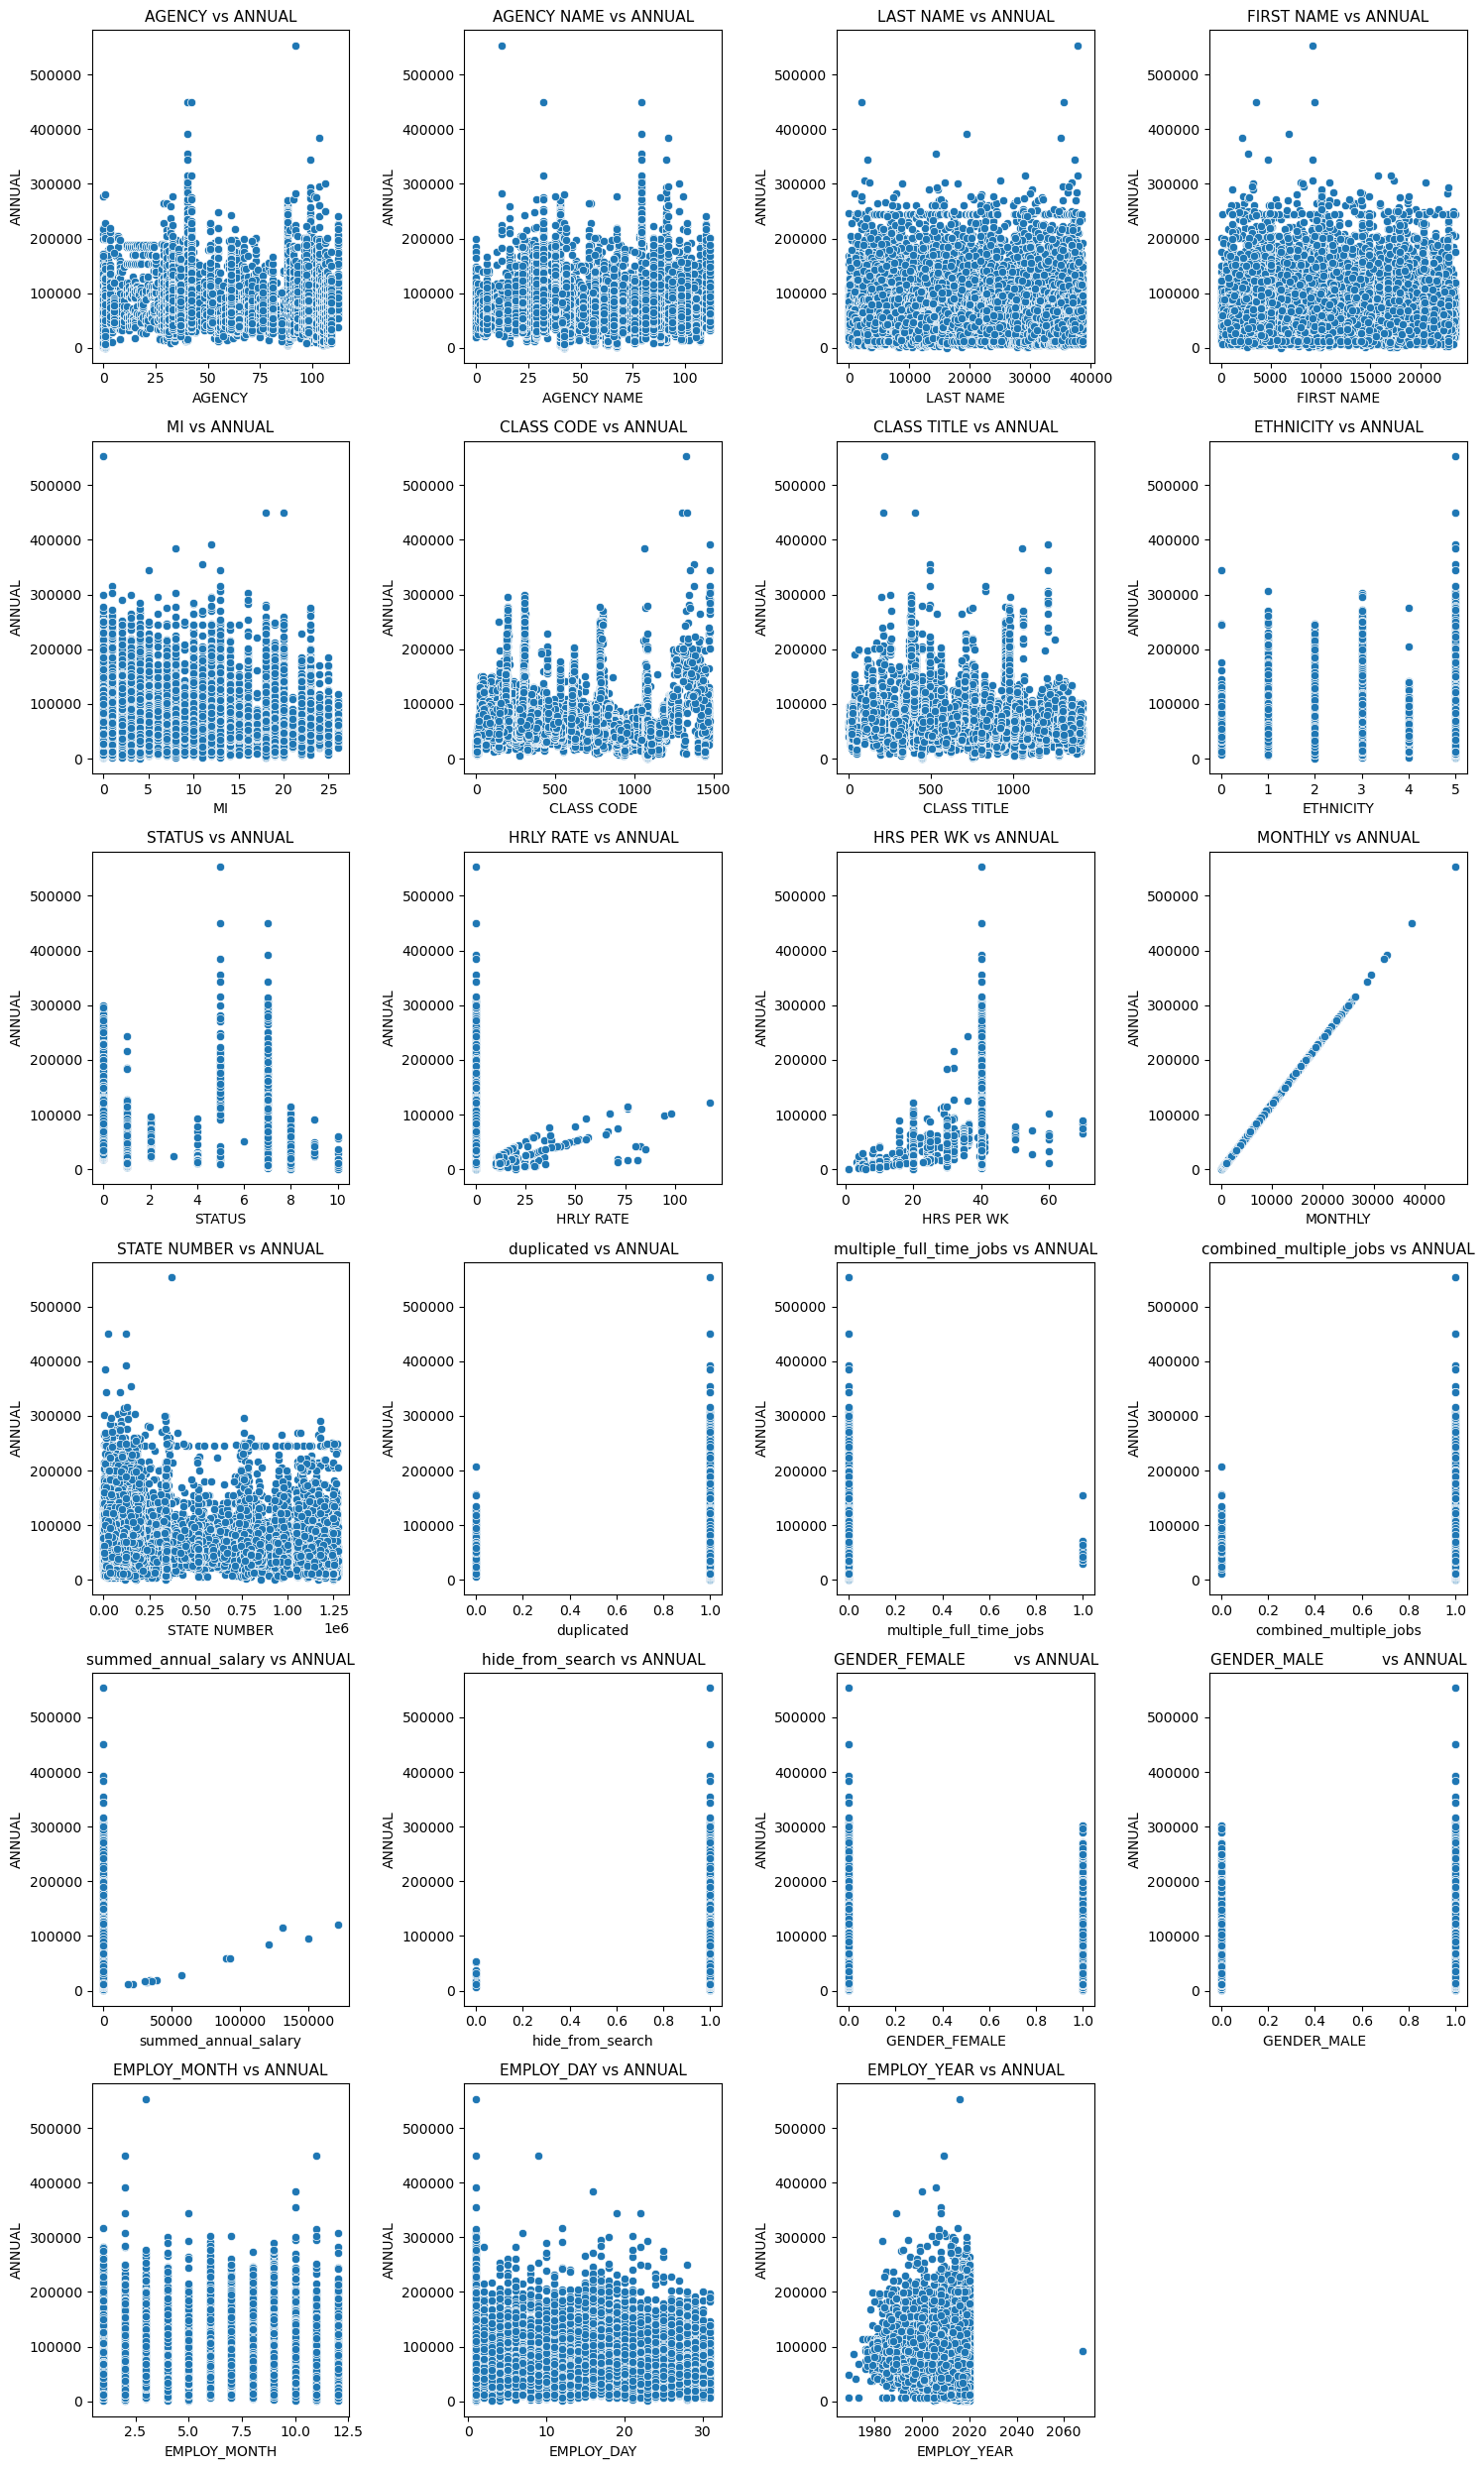

In [43]:
# Specify the target variable as a string
target_variable = 'ANNUAL'  # Use the name of the target variable as a string
features_x = data.drop(columns=[target_variable])  # Drop the target variable

# Get the list of features excluding the target variable
features = features_x.columns.tolist()  # List of feature names

plt.figure(figsize=(15, 25))  # Increase height for better visibility

# Set the number of features and determine the layout
num_features = len(features)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(features, start=1):
    plt.subplot(num_rows, num_cols, plot_num)
    sns.scatterplot(data=data, x=feature, y=target_variable) #, alpha=0.7, color='blue'
    plt.title(f'{feature} vs {target_variable}', fontsize=11)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel(target_variable, fontsize=10)

# Show all plots at once
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show() # f show the graphs

#### **Insights:**

**Agency vs. Annual:** There seems to be some variation in annual salaries across different agencies, but it's not very clear.

**Agency Name vs. Annual:** Similar to Agency, there seems to be some variation in annual salaries across different agency names, but it's not very clear.

**Last Name vs. Annual:** There is no clear relationship between last name and annual salary.

**First Name vs. Annual:** There is no clear relationship between first name and annual salary.

**MI vs. Annual:** There seems to be some variation in annual salaries across different middle initials, but it's not very clear.

**Class Code vs. Annual:** There seems to be some variation in annual salaries across different class codes, but it's not very clear.

**Class Title vs. Annual:** There seems to be some variation in annual salaries across different class titles, but it's not very clear.

**Ethnicity vs. Annual:** There seems to be some variation in annual salaries across different ethnicities, but it's not very clear.

**Status vs. Annual:** There seems to be no clear relationship between status and annual salary.

**Hourly Rate vs. Annual:** There is a positive correlation between hourly rate and annual salary, indicating that higher hourly rates tend to be 
associated with higher annual salaries.

**Hours Per Week vs. Annual:** There is a weak positive correlation between hours per week and annual salary, indicating that more hours per week tend to be associated with slightly higher annual salaries.

**Monthly Salary vs. Annual:** There is a strong positive correlation between monthly salary and annual salary, indicating that higher monthly salaries tend to be associated with higher annual salaries.

**State Number vs. Annual:** There seems to be no clear relationship between state number and annual salary.

**Duplicated vs. Annual:** There seems to be no clear relationship between duplicated and annual salary.

**Multiple Full-Time Jobs vs. Annual:** There seems to be no clear relationship between multiple full-time jobs and annual salary.

**Combined Multiple Jobs vs. Annual:** There seems to be no clear relationship between combined multiple jobs and annual salary.

**summed_annual_salary vs. ANNUAL:** There seems to be a positive correlation between the summed annual salary and annual salary. This suggests that higher summed annual salaries tend to be associated with higher annual salaries.

**hide_from_search vs. ANNUAL:** There is no clear relationship between whether a job is hidden from search and its annual salary.

**GENDER FEMALE vs. ANNUAL:** There seems to be no clear difference in annual salaries between female and male employees.

**GENDER MALE vs. ANNUAL:** There seems to be no clear difference in annual salaries between female and male employees.

**EMPLOY_MONTH vs. ANNUAL:** There is no clear relationship between the month of employment and annual salary.

**EMPLOY_DAY vs. ANNUAL:** There is no clear relationship between the day of employment and annual salary.

**EMPLOY_YEAR vs. ANNUAL:** There seems to be no clear relationship between the year of employment and annual salary.

#### **Final EDA Report**

* Salary Distribution: The distribution of annual salaries is skewed, indicating a significant number of low-paying jobs and a smaller number of high-paying jobs.
* Hourly Rate and Annual Salary: There is a positive correlation between hourly rate and annual salary.
* Monthly Salary and Annual Salary: There is a strong positive correlation between monthly salary and annual salary.
* Job Status and Annual Salary: There seems to be no clear relationship between job status and annual salary.
* Gender and Annual Salary: There seems to be no significant difference in annual salaries between male and female employees.

In [44]:
numerical_col = data[["AGENCY", "HRLY RATE", "HRS PER WK", "MONTHLY", "STATE NUMBER", "multiple_full_time_jobs", "summed_annual_salary"]]

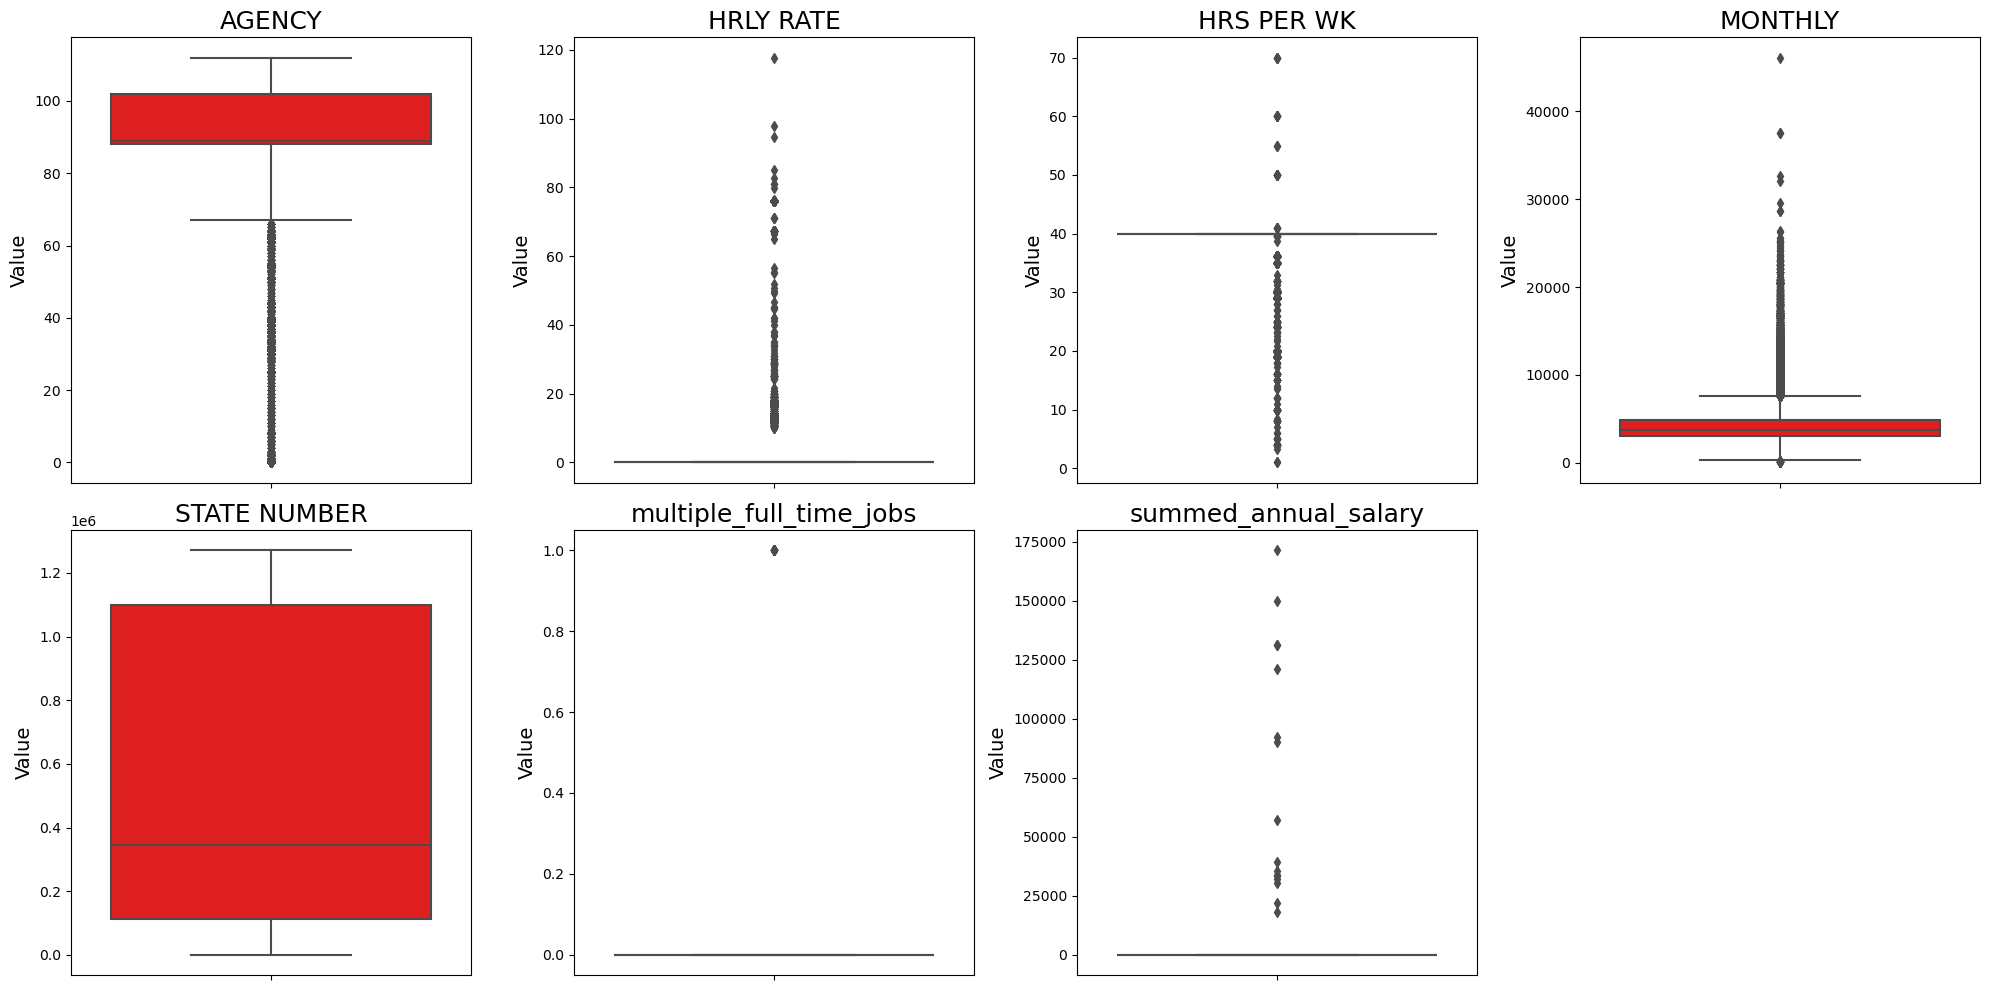

In [45]:
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

# Set the number of features and determine the layout
num_features = len(numerical_col.columns)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(numerical_col.columns, start=1):
    plt.subplot(num_rows, num_cols, plot_num)
    sns.boxplot(y=numerical_col[feature], color='red')  # Use 'y' parameter for vertical box plots
    plt.title(feature, fontsize=18)
    plt.ylabel('Value', fontsize=14)

# Show all plots at once
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show() # show the graph

* Now we handle the outliers with mean, median, mode statistical method.

**AGENCY**

In [46]:
data.loc[(data.AGENCY) < 65 , "AGENCY"] = 88 # handle the outliers

**HRLY RATE**

In [47]:
data.loc[(data["HRLY RATE"]) > 10 , "HRLY RATE"] = data["HRLY RATE"].median() # handle the outliers

**HRS PER WK**

In [48]:
# Replace outliers with the median
data.loc[(data["HRS PER WK"] >= 41) | (data["HRS PER WK"] <= 39.60), "HRS PER WK"] = data["HRS PER WK"].median()

**MONTHLY**

In [49]:
# Replace outliers with the median
data.loc[(data["MONTHLY"] <= 60) | (data["MONTHLY"] >= 26000), "MONTHLY"] = data["MONTHLY"].median()

**multiple_full_time_jobs**

In [50]:
data["multiple_full_time_jobs"] = data["multiple_full_time_jobs"].astype(int) # here we set the corrupted datatype

**summed_annual_salary**

In [51]:
# Replace outliers with the median
data.loc[(data["summed_annual_salary"] >= 17500), "summed_annual_salary"] = data["summed_annual_salary"].median()

## Feature Selection
* **Identify Important Features:**
  * Use correlation analysis and feature importance metrics .

In [52]:
data.corr() # Check the correlation of all features

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search,GENDER_FEMALE,GENDER_MALE,EMPLOY_MONTH,EMPLOY_DAY,EMPLOY_YEAR
AGENCY,1.000000,0.708791,-0.008991,-0.007546,0.094199,0.039999,-0.222987,0.037603,-0.024869,-0.003502,NaN,-0.119203,-0.118752,0.038686,0.012723,-0.003122,0.017557,NaN,-0.004199,-0.195320,0.195320,-0.040290,0.175540,-0.084154
AGENCY NAME,0.708791,1.000000,-0.003935,-0.003461,-0.000053,-0.052702,-0.150526,0.030906,-0.009776,-0.000250,NaN,-0.086383,-0.085757,0.021148,-0.005359,-0.006730,-0.010355,NaN,0.000973,-0.190787,0.190787,-0.004742,0.098060,-0.054669
LAST NAME,-0.008991,-0.003935,1.000000,0.009045,0.006241,-0.002381,0.004274,0.013056,0.003681,0.003543,NaN,0.009472,0.009889,-0.005139,-0.004754,0.002092,-0.002459,NaN,-0.003098,0.003985,-0.003985,0.000353,0.000868,-0.003045
FIRST NAME,-0.007546,-0.003461,0.009045,1.000000,-0.005113,-0.015143,0.007079,-0.015361,-0.004476,-0.003289,NaN,0.010961,0.010419,-0.032147,0.004358,0.000456,0.003865,NaN,0.001968,0.025838,-0.025838,0.011358,-0.008694,-0.022015
MI,0.094199,-0.000053,0.006241,-0.005113,1.000000,0.032279,-0.027416,0.079420,0.016814,0.002966,NaN,0.017821,0.018034,-0.048084,-0.002707,-0.001196,-0.003342,NaN,-0.000491,-0.018192,0.018192,0.004656,0.015079,-0.061321
CLASS CODE,0.039999,-0.052702,-0.002381,-0.015143,0.032279,1.000000,0.144373,-0.056818,0.225200,0.005229,NaN,-0.076579,-0.074360,0.047658,-0.011026,-0.006426,-0.009018,NaN,-0.008003,-0.127360,0.127360,-0.030123,0.039863,0.033223
CLASS TITLE,-0.222987,-0.150526,0.004274,0.007079,-0.027416,0.144373,1.000000,0.044255,0.009949,0.000306,NaN,0.086297,0.085747,-0.092181,-0.002951,-0.003132,-0.003123,NaN,-0.003498,-0.060309,0.060309,0.013325,-0.083300,-0.067293
ETHNICITY,0.037603,0.030906,0.013056,-0.015361,0.079420,-0.056818,0.044255,1.000000,0.090649,0.002439,NaN,0.170528,0.170107,-0.074631,-0.015149,-0.002698,-0.012649,NaN,-0.008329,-0.106739,0.106739,-0.018199,-0.014845,-0.091222
STATUS,-0.024869,-0.009776,0.003681,-0.004476,0.016814,0.225200,0.009949,0.090649,1.000000,0.035059,NaN,0.180771,0.183917,-0.007632,-0.096329,-0.001842,-0.087655,NaN,-0.040240,-0.033160,0.033160,-0.057928,-0.031846,-0.037000
HRLY RATE,-0.003502,-0.000250,0.003543,-0.003289,0.002966,0.005229,0.000306,0.002439,0.035059,1.000000,NaN,-0.007357,-0.007314,0.006192,0.000139,-0.000043,0.000114,NaN,0.000046,-0.002150,0.002150,-0.005672,0.005184,0.004257


<Axes: >

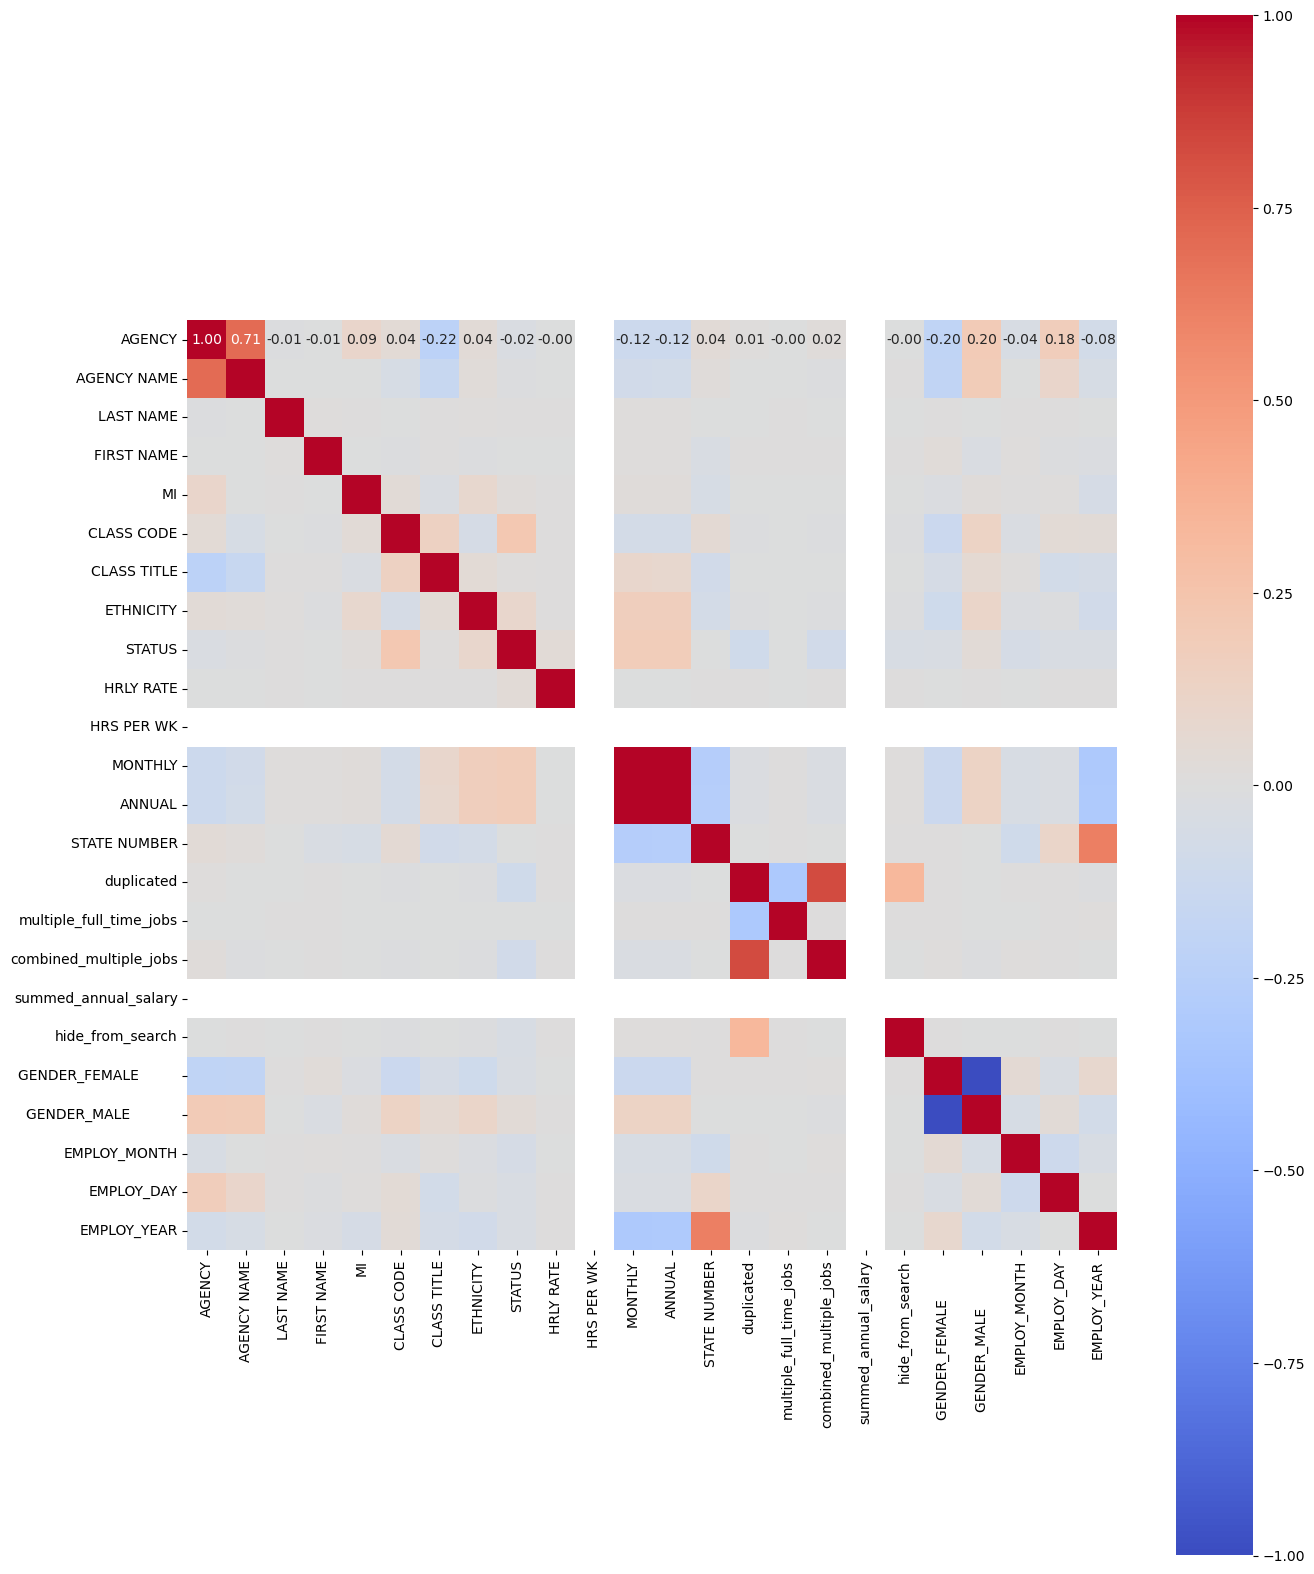

In [53]:
# Here is heatmap of correlation of all features
plt.figure(figsize=(15, 20))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True) # ploting the heat map for checking correlation

#### **Insights**
**Agency and Agency Name:** Strong positive correlation, indicating that these two variables are highly related.

**State Number and EMPLOY_YEAR:** Strong positive correlation, suggesting that newer hires are more likely to be assigned to specific states.

**duplicated and multiple_full_time_jobs:** Strong positive correlation, indicating that records with duplicates are often associated with multiple full-time jobs.

**duplicated and combined_multiple_jobs:** Strong positive correlation, suggesting that records with duplicates are often associated with combined multiple jobs.

**GENDER_FEMALE and GENDER_MALE:** Perfect negative correlation, as expected, since these are mutually exclusive categories.

**EMPLOY_MONTH and EMPLOY_DAY:** Weak negative correlation, suggesting a slight inverse relationship between the month and day of employment.

### Scaling
* Now we apply the scaling.

In [54]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler # importing Scaler for transform the data in the certain range

In [55]:
scaler = StandardScaler() # save the StandardScaler

In [56]:
# We applying scaling on this columns
Scaler_features = data[["HRLY RATE", "HRS PER WK", "MONTHLY", "summed_annual_salary"]]

In [57]:
scaled_data = scaler.fit_transform(Scaler_features) # Apply Standard Scaler Scaling

In [58]:
scaled_df = pd.DataFrame(scaled_data, columns=Scaler_features.columns) # Convert back to a DataFrame

In [59]:
data.drop(["HRLY RATE", "HRS PER WK", "MONTHLY", "summed_annual_salary"],axis=1,inplace=True) # drop the old columns

In [60]:
data = pd.concat([data,scaled_df],axis=1) # Concat with original DataFrame

## Model Selection

* **Objective:** Choose the most appropriate predictive models.
* **Actions:**
  * Test various algorithms (e.g., Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machines).
  * Evaluate models based on metrics such as accuracy, precision, recall, and F1 score.

In [61]:
X = data.drop(["ANNUAL"],axis=1) # define the X
y = data.ANNUAL # define the y

## Modeling
* **Train-Test Split:**
  * Split the dataset into training and testing sets (75/25 split).

In [62]:
from sklearn.model_selection import train_test_split  # importing train_test_split for spliting the data into training and testing

In [63]:
# Here we split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

## Model Creation and Model Evaluation

### Model Training and Tuning

* **Objective:** Optimize model performance, and Assess the final model's performance on unseen data.
* **Actions:**
  * Use cross-validation to validate model performance.
  * Fine-tune hyperparameters using techniques such as Grid Search or Random Search.
  * Evaluate the model using the train and test dataset.

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # importing the metrics of classfication

### **Linear Regression**

In [65]:
from sklearn.linear_model import LinearRegression # importing the Logistic regression Algorithm

In [66]:
LR_model = LinearRegression() # save the model

In [67]:
LR_model.fit(X_train,y_train) # Train the model

LinearRegression()

In [68]:
LR_train_predict = LR_model.predict(X_train) # Prediction for training
LR_test_predict = LR_model.predict(X_test) # Prediction for testing

In [69]:
LR_training_R2 = r2_score(y_train,LR_train_predict) # R2 for training
LR_testing_R2 = r2_score(y_test,LR_test_predict) # R2 for testing

In [70]:
print("Training R2 Score",LR_training_R2) # See the Training R2
print("Testing R2 Score",LR_testing_R2)# See the Testing R2

Training R2 Score 0.9863950684465361
Testing R2 Score 0.9879715191401107


In [134]:
print("Training Mean squared error: ",mean_squared_error(y_train,LR_train_predict)) # see the training error
print("Testing Mean squared error: ",mean_squared_error(y_test,LR_test_predict)) # see the testing error

Training Mean squared error:  8573315.825281825
Testing Mean squared error:  7614246.488667708


### **Polynomial Regression**

In [72]:
from sklearn.preprocessing import PolynomialFeatures # Importing polynomial features

In [73]:
# Polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust degree

In [74]:
X_Train_poly = poly.fit_transform(X_train)
X_Test_poly = poly.fit_transform(X_test)

In [75]:
# save the model
poly_model = LinearRegression()

In [76]:
poly_model.fit(X_Train_poly, y_train) # train the model

LinearRegression()

In [77]:
poly_train_predict = poly_model.predict(X_Train_poly) # Prediction for training
poly_test_predict = poly_model.predict(X_Test_poly) # Prediction for testing

In [78]:
poly_training_R2 = r2_score(y_train,poly_train_predict) # R2 for training
poly_testing_R2 = r2_score(y_test,poly_test_predict) # R2 for testing

In [79]:
print("Training R2 Score",poly_training_R2) # See the Training R2
print("Testing R2 Score",poly_testing_R2)# See the Testing R2

Training R2 Score 0.9865871163051917
Testing R2 Score 0.9880372555117002


In [136]:
print("Training Mean squared error: ",mean_squared_error(y_train, poly_train_predict)) # see the training error
print("Testing Mean squared error: ",mean_squared_error(y_test, poly_test_predict)) # see the testing error

Training Mean squared error:  8452294.492733987
Testing Mean squared error:  7572634.173498149


### **Ridge Regression**

In [80]:
from sklearn.linear_model import Ridge # Importing Ridge model

In [81]:
# save the model
Ridge_model = Ridge(alpha=1.0)  # Adjust alpha

In [82]:
Ridge_model.fit(X_train, y_train) # train the model

Ridge()

In [83]:
Ridge_train_predict = Ridge_model.predict(X_train) # Prediction for training
Ridge_test_predict = Ridge_model.predict(X_test) # Prediction for testing

In [84]:
Ridge_training_R2 = r2_score(y_train,Ridge_train_predict) # R2 for training
Ridge_testing_R2 = r2_score(y_test,Ridge_test_predict) # R2 for testing

In [85]:
print("Training R2 Score",Ridge_training_R2) # See the Training R2
print("Testing R2 Score",Ridge_testing_R2)# See the Testing R2

Training R2 Score 0.9863950679089444
Testing R2 Score 0.9879715137220116


In [137]:
print("Training Mean squared error: ",mean_squared_error(y_train, Ridge_train_predict)) # see the training error
print("Testing Mean squared error: ",mean_squared_error(y_test, Ridge_test_predict)) # see the testing error

Training Mean squared error:  8573316.164051943
Testing Mean squared error:  7614249.918422705


### **Lasso Regression**

In [86]:
from sklearn.linear_model import Lasso # importing Lasso model

In [87]:
# save the model
Lasso_model = Lasso(alpha=0.1)  # Adjust alpha

In [88]:
Lasso_model.fit(X_train,y_train) # train the model

Lasso(alpha=0.1)

In [89]:
Lasso_train_predict = Lasso_model.predict(X_train) # Prediction for training
Lasso_test_predict = Lasso_model.predict(X_test) # Prediction for testing

In [90]:
Lasso_training_R2 = r2_score(y_train,Lasso_train_predict) # R2 for training
Lasso_testing_R2 = r2_score(y_test,Lasso_test_predict) # R2 for testing

In [91]:
print("Training R2 Score",Lasso_training_R2) # See the Training R2
print("Testing R2 Score",Lasso_testing_R2)# See the Testing R2

Training R2 Score 0.9863950323428989
Testing R2 Score 0.9879714476282804


In [138]:
print("Training Mean squared error: ",mean_squared_error(y_train, Lasso_train_predict)) # see the training error
print("Testing Mean squared error: ",mean_squared_error(y_test, Lasso_test_predict)) # see the testing error

Training Mean squared error:  8573338.576435229
Testing Mean squared error:  7614291.756952972


### **Elastic Net**

In [92]:
from sklearn.linear_model import ElasticNet # Importing ElasticNet model

In [93]:
# save the model
EN_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust parameters as needed

In [94]:
EN_model.fit(X_train,y_train) # train the model

ElasticNet()

In [95]:
EN_train_predict = EN_model.predict(X_train) # Prediction for training
EN_test_predict = EN_model.predict(X_test) # Prediction for testing

In [96]:
EN_training_R2 = r2_score(y_train, EN_train_predict) # R2 for training
EN_testing_R2 = r2_score(y_test, EN_test_predict) # R2 for testing

In [97]:
print("Training R2 Score", EN_training_R2) # See the Training R2
print("Testing R2 Score", EN_testing_R2)# See the Testing R2

Training R2 Score 0.8726289253724877
Testing R2 Score 0.874978992765959


In [139]:
print("Training Mean squared error: ",mean_squared_error(y_train, EN_train_predict)) # see the training error
print("Testing Mean squared error: ",mean_squared_error(y_test, EN_test_predict)) # see the testing error

Training Mean squared error:  80264457.45029722
Testing Mean squared error:  79140564.50103213


### **Decision Tree Regression**

In [98]:
from sklearn.tree import DecisionTreeRegressor # Importing DecisionTreeRegressor model

In [99]:
DT_model = DecisionTreeRegressor() # save the model

In [100]:
DT_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [101]:
DT_train_predict = DT_model.predict(X_train) # Prediction for training
DT_test_predict = DT_model.predict(X_test) # Prediction for testing

In [102]:
DT_training_R2 = r2_score(y_train, DT_train_predict) # R2 for training
DT_testing_R2 = r2_score(y_test, DT_test_predict) # R2 for testing

In [103]:
print("Training R2 Score", DT_training_R2) # See the Training R2
print("Testing R2 Score", DT_testing_R2)# See the Testing R2

Training R2 Score 0.9999999999999996
Testing R2 Score 0.9998973394344949


In [140]:
print("Training Mean squared error: ",mean_squared_error(y_train, DT_train_predict)) # see the training error
print("Testing Mean squared error: ",mean_squared_error(y_test, DT_test_predict)) # see the testing error

Training Mean squared error:  2.5689055393182694e-07
Testing Mean squared error:  64985.999439736675


### **Random Forest Regression**

In [104]:
from sklearn.ensemble import RandomForestRegressor # Importing RandomForestRegressor algorithm

In [105]:
RF_model = RandomForestRegressor() # save the model

In [106]:
RF_model.fit(X_train,y_train) # train the model

RandomForestRegressor()

In [107]:
RF_train_predict = RF_model.predict(X_train) # Prediction for training
RF_test_predict = RF_model.predict(X_test) # Prediction for testing

In [108]:
RF_training_R2 = r2_score(y_train, RF_train_predict) # R2 for training
RF_testing_R2 = r2_score(y_test, RF_test_predict) # R2 for testing

In [109]:
print("Training R2 Score", RF_training_R2) # See the Training R2
print("Testing R2 Score", RF_testing_R2)# See the Testing R2

Training R2 Score 0.9994148229577965
Testing R2 Score 0.9987578849628879


In [141]:
print("Training Mean squared error: ",mean_squared_error(y_train, RF_train_predict)) # see the training error
print("Testing Mean squared error: ",mean_squared_error(y_test, RF_test_predict)) # see the testing error

Training Mean squared error:  368756.54807965015
Testing Mean squared error:  786281.3409289982


### **Gradient Boosting Regression**

In [110]:
from sklearn.ensemble import GradientBoostingRegressor # Iporting GradientBoostingRegressor algorithmn

In [111]:
GB_model = GradientBoostingRegressor(n_estimators=100) # save the model

In [112]:
GB_model.fit(X_train,y_train) #train the model

GradientBoostingRegressor()

In [113]:
GB_train_predict = GB_model.predict(X_train) # Prediction for training
GB_test_predict = GB_model.predict(X_test) # Prediction for testing

In [114]:
GB_training_R2 = r2_score(y_train, GB_train_predict) # R2 for training
GB_testing_R2 = r2_score(y_test, GB_test_predict) # R2 for testing

In [115]:
print("Training R2 Score", GB_training_R2) # See the Training R2
print("Testing R2 Score", GB_testing_R2)# See the Testing R2

Training R2 Score 0.9986001571184381
Testing R2 Score 0.9925630785877613


In [142]:
print("Training Mean squared error: ",mean_squared_error(y_train, GB_train_predict)) # see the training error
print("Testing Mean squared error: ",mean_squared_error(y_test, GB_test_predict)) # see the testing error

Training Mean squared error:  882128.2990098716
Testing Mean squared error:  4707706.102643944


### **K-Nearest Neighbors (KNN) Regression**

In [116]:
from sklearn.neighbors import KNeighborsRegressor # Iporting GradientBoostingRegressor algorithmn

In [117]:
KNN_model = KNeighborsRegressor(n_neighbors=5) # save the model

In [118]:
KNN_model.fit(X_train,y_train) # train the model

KNeighborsRegressor()

In [119]:
KNN_train_predict = KNN_model.predict(X_train) # Prediction for training
KNN_test_predict = KNN_model.predict(X_test) # Prediction for testing

In [120]:
KNN_training_R2 = r2_score(y_train, KNN_train_predict) # R2 for training
KNN_testing_R2 = r2_score(y_test, KNN_test_predict) # R2 for testing

In [121]:
print("Training R2 Score", KNN_training_R2) # See the Training R2
print("Testing R2 Score", KNN_testing_R2)# See the Testing R2

Training R2 Score 0.2811513786686106
Testing R2 Score -0.07859082528231975


In [143]:
print("Training Mean squared error: ",mean_squared_error(y_train, KNN_train_predict)) # see the training error
print("Testing Mean squared error: ",mean_squared_error(y_test, KNN_test_predict)) # see the testing error

Training Mean squared error:  452991346.33818436
Testing Mean squared error:  682767549.7661068


### **Neural Network Regression (MLPRegressor)**

In [122]:
from sklearn.neural_network import MLPRegressor # Iporting MLPRegressor algorithmn

In [144]:
NN_model = MLPRegressor() # save the model

In [145]:
NN_model.fit(X_train,y_train) #train the model

MLPRegressor()

In [146]:
NN_train_predict = NN_model.predict(X_train) # Prediction for training
NN_test_predict = NN_model.predict(X_test) # Prediction for testing

In [147]:
NN_training_R2 = r2_score(y_train, NN_train_predict) # R2 for training
NN_testing_R2 = r2_score(y_test, NN_test_predict) # R2 for testing

In [148]:
print("Training R2 Score", NN_training_R2) # See the Training R2
print("Testing R2 Score", NN_testing_R2)# See the Testing R2

Training R2 Score 0.7587926864382124
Testing R2 Score 0.7614694322505456


In [149]:
print("Training Mean squared error: ",mean_squared_error(y_train, NN_train_predict)) # see the training error
print("Testing Mean squared error: ",mean_squared_error(y_test, NN_test_predict)) # see the testing error

Training Mean squared error:  151999770.84827662
Testing Mean squared error:  150994174.49984765


### Model Comparsion Report

In [157]:
# Save the all models accuracy in a dataframe
Model_performance = pd.DataFrame({"Model":[" Linear Regression","Polynomial Regression","Ridge Regression","Lasso Regression",
                                           "Elastic Net","Decision Tree Regression","Random Forest Regression","Gradient Boosting Regression",
                                           "K-Nearest Neighbors (KNN) Regression","Neural Network Regression (MLPRegressor)"],
                                  "Training R2 Score":[LR_training_R2*100,poly_training_R2*100,Ridge_training_R2*100,Lasso_training_R2*100,
                                                       EN_training_R2*100,DT_training_R2*100,RF_training_R2*100,GB_training_R2*100,
                                                       KNN_training_R2*100,NN_training_R2*100],
                                  "Testing R2 Score":[LR_testing_R2*100,poly_testing_R2*100,Ridge_testing_R2*100,Lasso_testing_R2*100,
                                                      EN_testing_R2*100,DT_testing_R2*100,RF_testing_R2*100,GB_testing_R2*100,
                                                      KNN_testing_R2*100,NN_testing_R2*100]})

In [158]:
Model_performance

,Model,Training R2 Score,Testing R2 Score
0,Linear Regression,98.639507,98.797152
1,Polynomial Regression,98.658712,98.803726
2,Ridge Regression,98.639507,98.797151
3,Lasso Regression,98.639503,98.797145
4,Elastic Net,87.262893,87.497899
5,Decision Tree Regression,100.000000,99.989734
6,Random Forest Regression,99.941482,99.875788
7,Gradient Boosting Regression,99.860016,99.256308
8,K-Nearest Neighbors (KNN) Regression,28.115138,-7.859083
9,Neural Network Regression (MLPRegressor),75.879269,76.146943


In [159]:
df = pd.DataFrame(Model_performance)

In [160]:
# Print the DataFrame columns for debugging
print("DataFrame Columns:", df.columns)

DataFrame Columns: Index(['Model', 'Training R2 Score', 'Testing R2 Score'], dtype='object')


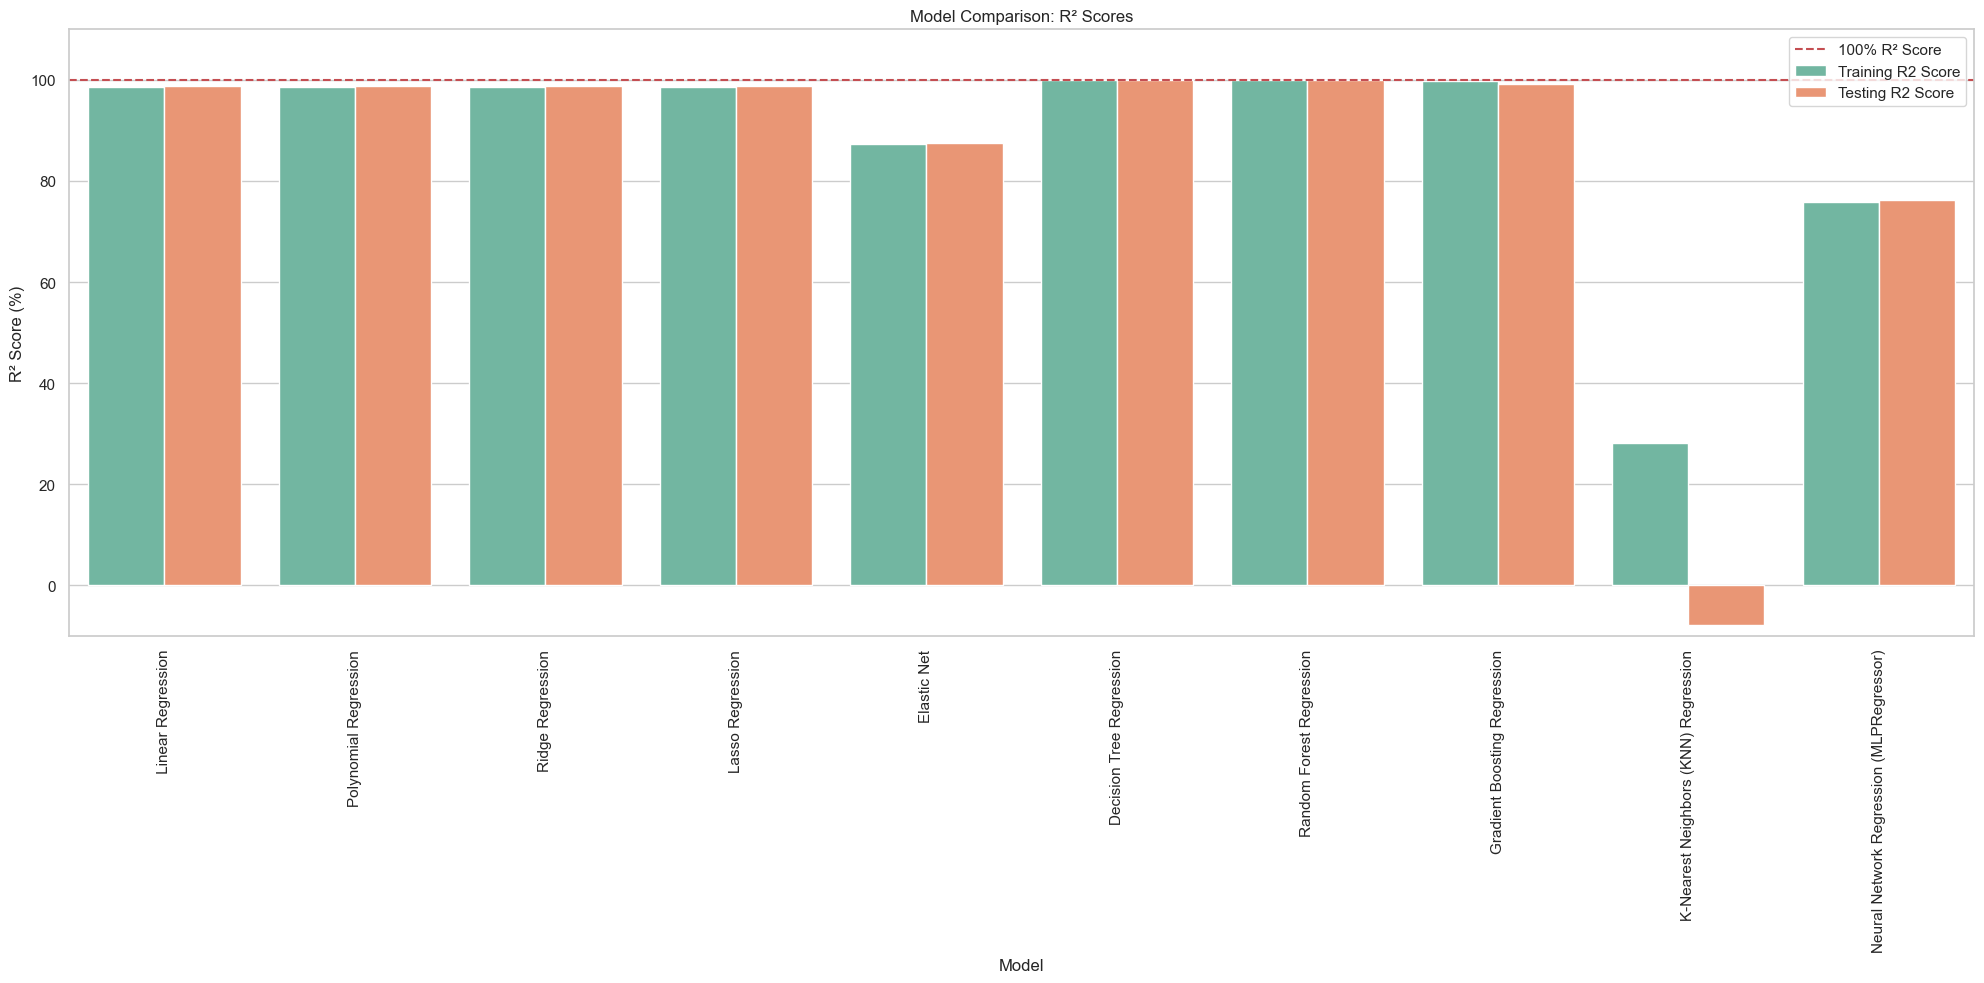

In [161]:
# Melt the dataframe for better visualization
df_melted = df.melt(id_vars='Model',
                    value_vars=['Training R2 Score', 'Testing R2 Score'],
                    var_name='Metric',
                    value_name='R2 Score')

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(20, 10))
sns.barplot(data=df_melted, x='Model', y='R2 Score', hue='Metric', palette='Set2')
plt.title('Model Comparison: R² Scores')
plt.xlabel('Model')
plt.ylabel('R² Score (%)')
plt.xticks(rotation=90)
plt.ylim(-10, 110)  # Set limits for better visibility
plt.axhline(y=100, color='r', linestyle='--', label='100% R² Score')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

#### **Final Conclusion**

* Based on the R² scores obtained from the models evaluated, the Decision Tree Regression model stands out as the best performer, achieving a perfect training R² score of 100% and an impressively high testing R² score of 99.99%. This indicates that the model is highly capable of capturing the underlying patterns in the training data while maintaining excellent predictive performance on unseen data.

* Following closely are the Random Forest Regression and Gradient Boosting Regression models, with testing R² scores of 99.88% and 99.26%, respectively. Both of these ensemble methods demonstrate strong generalization capabilities, making them suitable choices for applications where robustness and predictive accuracy are crucial.

* Conversely, the K-Nearest Neighbors (KNN) Regression model performs poorly, with a testing R² score of -7.86%, suggesting that it fails to capture the relationships within the data. Similarly, the Elastic Net and Neural Network Regression models exhibit lower performance, indicating that they may not be suitable for the specific dataset at hand.

#### **Challenges Faced**

* Data Quality Issues: The dataset contains approximately 150,000 rows and 21 columns, which presents significant challenges in terms of data quality. There are numerous instances of corrupted data and null values, making it imperative to perform extensive data cleaning and preprocessing. This step was critical to ensure that the models were trained on reliable data.

* Handling Null Values: Managing null values was a significant challenge. Various strategies had to be employed, such as imputation and removal of incomplete rows, to mitigate the impact of missing data on model performance. The choice of method directly affected the reliability of the results.

* Corrupted Data: Corrupted entries could skew model predictions and evaluations. Identifying and rectifying these corrupted values required careful analysis and validation, which added to the complexity of the data preparation phase.

* Model Selection: With a wide range of models available, selecting the most appropriate ones for the given dataset was challenging. The initial trials required extensive experimentation to identify models that could handle the data's complexities, particularly with high-dimensionality and non-linear relationships.

* Overfitting Risks: Some models, such as the Decision Tree Regression, exhibited signs of overfitting, as indicated by the perfect training score but very high testing score. This necessitated the need for regularization techniques and validation to ensure that models generalized well to unseen data.

* Performance Variability: There was a notable variability in performance across different models. While some models performed exceptionally well, like the Decision Tree and Random Forest, others like KNN performed poorly. Understanding the underlying reasons for this variability and adjusting model parameters was a continual challenge.

* Computational Resources: The size of the dataset demanded considerable computational resources for training and evaluating models. Running complex algorithms, especially ensemble methods, required optimizing resource usage and potentially leveraging more powerful computing environments.

## Final Model Save

In [162]:
import pickle # use for save the model

In [163]:
with open("Texas Employee Salary.pkl","wb") as f:  # save model
    pickle.dump(RF_model,f) # save SVM model

In [164]:
with open("Texas Employee Salary.pkl","rb") as f: # load the model
    Model_new = pickle.load(f) # save as Mdel_new the file for prediction

In [165]:
X_array = np.array(X) # for easy to prediction we save the X in array form

In [ ]:
88,17,30461,15274,22,1409,711,5,8,127717,0,0,1,1,0,1,2,18,1988,0.00448,0.0,2.558837,0.0

In [169]:
X

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,STATUS,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,hide_from_search,GENDER_FEMALE,GENDER_MALE,EMPLOY_MONTH,EMPLOY_DAY,EMPLOY_YEAR,HRLY RATE,HRS PER WK,MONTHLY,summed_annual_salary
0,88,17,30461,15274,22,1409,711,5,8,127717,0,0,1,1,0,1,2,18,1988,-0.00448,0.0,2.558837,0.0
1,88,48,30461,15274,22,616,560,5,4,127717,0,0,1,0,0,1,2,1,2015,-0.00448,0.0,-1.355749,0.0
2,88,17,33197,10053,10,1409,711,5,8,59115,0,0,1,1,0,1,2,1,2020,-0.00448,0.0,2.558837,0.0
3,88,48,33197,10053,10,616,560,5,4,59115,0,0,1,0,0,1,9,1,2018,-0.00448,0.0,-1.355749,0.0
4,102,88,26462,6953,0,810,292,3,0,165030,0,1,1,1,1,0,6,29,2020,-0.00448,0.0,-0.452000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,109,76,37355,10053,16,1042,1198,5,0,770781,1,0,1,1,0,1,10,30,2017,-0.00448,0.0,-0.637255,0.0
149477,109,76,37780,7024,1,84,1404,5,0,847431,1,0,1,1,1,0,7,13,2015,-0.00448,0.0,0.613423,0.0
149478,109,76,38068,5571,3,4,324,5,1,34266,1,0,1,1,0,1,10,15,2012,-0.00448,0.0,-1.492391,0.0
149479,109,76,38313,6089,18,278,1007,5,0,123490,1,0,1,1,0,1,9,22,1989,-0.00448,0.0,0.730827,0.0


In [166]:
X_array[0] # see the first row of X

array([ 8.80000000e+01,  1.70000000e+01,  3.04610000e+04,  1.52740000e+04,
        2.20000000e+01,  1.40900000e+03,  7.11000000e+02,  5.00000000e+00,
        8.00000000e+00,  1.27717000e+05,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        2.00000000e+00,  1.80000000e+01,  1.98800000e+03, -4.47993784e-03,
        0.00000000e+00,  2.55883714e+00,  0.00000000e+00])

In [167]:
# see the prediction
Model_new.predict([[8.80000000e+01,  1.70000000e+01,  3.04610000e+04,  1.52740000e+04,
        2.20000000e+01,  1.40900000e+03,  7.11000000e+02,  5.00000000e+00,
        8.00000000e+00,  1.27717000e+05,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        2.00000000e+00,  1.80000000e+01,  1.98800000e+03, -4.47993784e-03,
        0.00000000e+00,  2.55883714e+00,  0.00000000e+00]]) 

array([114549.84])

In [172]:
# prediction with actual values
Model_new.predict([[88,17,30461,15274,22,1409,711,5,8,127717,0,0,1,1,0,1,2,18,1988,0.00448,0.0,2.558837,0.0]])

array([114549.84])

In [168]:
y.head(1) # see the first actual output

0    114549.84
Name: ANNUAL, dtype: float64

# Thank You......